In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

## The Hypergeometric Distribution ##

You have seen the hypergeometric probabilities earlier. In this section we will use them to define the distribution of a random count, and study the relation with the binomial distribution.

As a review of the hypergeometric setting, suppose you have a population of a fixed size $N$, and suppose you are interested in a particular group of those $N$ individuals. Let's call them "successes" or "good elements". For example, you might be interested in:
- a population of voters, and among them the group who will vote for a particular candidate
- a population of households, and among them the group that have annual incomes below $50,000
- a deck of cards, and the suit of diamonds

Let $N = G+B$ where $G$ is the number of good elements and $B$ the remaining number of elements which we will unkindly describe as "bad". 

Now suppose you take a simple random sample (SRS) of $n$ elements from the population.

### Number of Good Elements in a SRS ###
Let $X$ be the number of good elements in the sample. What is the distribution of $X$?

The largest $X$ can be is $\min(G, n)$. We'll say the smallest $X$ can be is 0, though if we are very careful we will see that in fact $X$ can't be any smaller than $\max(0, n-B)$.

Let $g$ be a possible value of $X$. Then, since all $\binom{N}{n}$ samples are equally likely,

$$
P(X = g) ~ = ~ \frac{\binom{G}{g} \binom{B}{b}}{\binom{N}{n}}, ~~~
g+b=n
$$

This is called the *hypergeometric distribution* with population size $N$, number of good elements or "successes" $G$, and sample size $n$. The name comes from the fact that the terms are the coefficients in a [*hypergeometric series*](https://en.wikipedia.org/wiki/Hypergeometric_function#The_hypergeometric_series), which is a piece of mathematics that we won't go into in this course.

### Example: Aces in a Five-Card Poker Hand ###
The number of aces $N_a$ in a five-card poker hand has the hypergeometric distribution with population size 52, four good elements in the population, and a simple random sample size of 5.

$$
P(N_a = k) = \frac{\binom{4}{k} \binom{48}{5-k}}{\binom{52}{5}}, ~~ k = 0, 1, 2, 3, 4
$$

The `stats.hypergeom.pmf` function allows us to calculate hypergeometric probabilities. The first argument is the set of possible values for which we want the probabilities. Then come the parameters, in the order population size, number of good elements, sample size.

In [2]:
k = np.arange(5)
N = 52 # population size
G = 4  # number of good elements in population
n = 5  # simple random sample size
stats.hypergeom.pmf(k, N, G, n)

array([  6.58841998e-01,   2.99473636e-01,   3.99298181e-02,
         1.73607905e-03,   1.84689260e-05])

Those are the chances of all the different possible numbers of aces in a poker hand. They are rather hard to read, so let's try rounding them.

In [3]:
np.round(stats.hypergeom.pmf(k, N, G, n), 3)

array([ 0.659,  0.299,  0.04 ,  0.002,  0.   ])

The number of aces among 5 cards is overwhelmingly likely to be 0 or 1. The histogram of the distribution can be drawn using `Plot`.

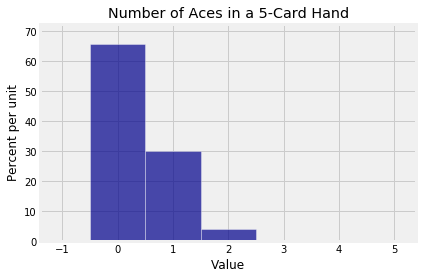

In [4]:
ace_probs = stats.hypergeom.pmf(k, N, G, n)
ace_dist = Table().values(k).probability(ace_probs)
Plot(ace_dist)
plt.title('Number of Aces in a 5-Card Hand');

### Red Cards in a Bridge Hand ###
Here is the distribution of the number of red cards in a bridge hand of 13 cards:

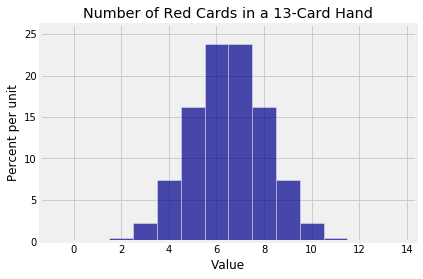

In [5]:
k = np.arange(14)
N = 52
G = 26
n = 13
bridge_probs = stats.hypergeom.pmf(k, N, G, n)
bridge_dist = Table().values(k).probability(bridge_probs)

Plot(bridge_dist)
plt.title('Number of Red Cards in a 13-Card Hand');

This one looks rather binomial. And indeed, there is a close relation between the binomial and the hypergeometric distributions.

### Relation with the Binomial ###
Suppose you have a population of $N = G+B$ elements as above, and suppose you sample $n$ times *with* replacement. Then the number of good elements in the sample has the binomial distribution with parameters $n$ and $G/N$. 

If you sample *without* replacement, then the distribution of the number of good elements is hypergeometric $(N, G, n)$.

The only difference between the two settings is the randomization: sampling with or without replacement. 

If the population size $N$ is large relative to the sample size $n$, then it doesn't make much difference whether you are sampling with or without replacement. If you only take out a very small proportion of the population as you sample, you make no noticeable difference to the proportions in the population.

To see whether this intuition can be confirmed by calculation, let's visualize some hypergeometric distributions and the corresponding binomial approximations. You can change the parameters in the code below. Just make sure that $n$ is small relative to $N$.

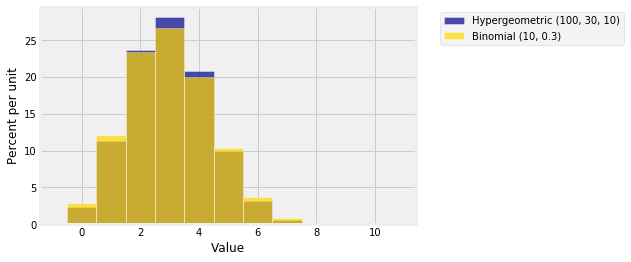

In [6]:
N = 100
G = 30
n = 10
k = np.arange(n+1)
hyp_probs = stats.hypergeom.pmf(k, N, G, n)
bin_probs = stats.binom.pmf(k, n, G/N)
hyp_dist = Table().values(k).probability(hyp_probs)
bin_dist = Table().values(k).probability(bin_probs)
Plots('Hypergeometric (100, 30, 10)', hyp_dist, 'Binomial (10, 0.3)', bin_dist)

They are pretty close, though you can see that the hypergeometric distribution is a bit taller and narrower. In a later chapter we will quantify this difference in spread.

### Fisher's Exact Test ###
Recall a [randomized controlled experiment](https://www.ncbi.nlm.nih.gov/pubmed/11376175) that was analyzed in Data 8. The treatment was the botulinum toxin A, a very potent toxin, used as medication for patients who had chronic back pain.

A total of 31 patients participated in the study. Of these, 15 were randomly assigned to the treatment group and the remaining 16 to the control group. Eight weeks after treatment, 11 of the 15 in the treatment group had pain relief compared to 2 out of 16 in the control group. 

In other words, of the 13 patients who had pain relief, 11 were in the treatment group and 2 in the control group. Is this evidence in favor of the treatment?

The null hypothesis says that the treatment does nothing; any difference between the two groups is due to the random assignment of patients to treatment and control. 

The alternative hypothesis says that the treatment was beneficial. 

Under the null hypothesis, the treatment did nothing, so among the 31 patients in the study, *13 would have had pain relief anyway*, regardless of the assignment to groups. 

To see which of the hypotheses is better supported by the data, we can find a P-value. This is the chance, under the null hypothesis, of getting data like the data that were observed or even more in the direction of the alternative. That is, the P-value is the chance of getting 11 or more of the "pain relief" patients in the treatment group, just by chance.

To find the chance that 11 or more of the "pain relief" group would have ended up in the treatment group, we just need a hypergeometric probability:
- N = 31, the population size
- G = 13, the total number of "pain relief" patients
- n = 15, the size of the treatment group
- g = 11 or more

In [7]:
sum(stats.hypergeom.pmf([11, 12, 13], 31, 13, 15))

0.00082997550460762949

That's a very small P-value, which implies that the data support the alternative hypothesis more than they support the null. The treatment helped. This is consistent with the conclusion of the researchers and also with our own analysis in Data 8 – but all three analyses are different.

In Data 8 we simulated the difference between the two group proportions under the null hypothesis, by pooling the two groups and randomly permuting the pooled sample. Our conclusion was based on an empirical, approximate P-value. 

The calculation here does not require simulation and produces an exact P-value.

This method is called Fisher's exact test. That's the same Sir Ronald Fisher who formalized tests of hypotheses, suggested cutoffs for P-values, and so on. The method can be used for any sample size and any randomized controlled experiment with a binary response.